# Library

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.utils as image
import os
import numpy as np

from keras.preprocessing.image import ImageDataGenerator


from keras.layers import *
from keras.models import *



import warnings
warnings.filterwarnings('ignore')


# Data Loading

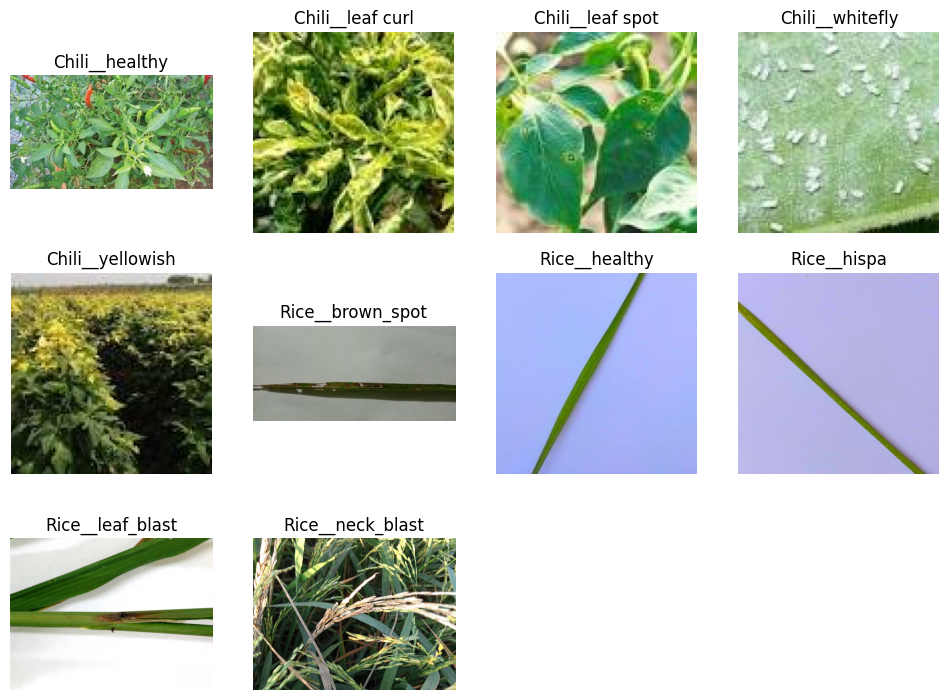

In [56]:

# Let's plot a few images
train_data = "Data/train"

image_categories = os.listdir('Data/train')

def plot_images(image_categories):
    
    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):
        
        # Load images for the ith category
        image_path = train_data + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0
        
        
        # Create Subplot and plot the images
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()

# Call the function
plot_images(image_categories)

# Data Preparation

In [ ]:
import os
import random
import shutil

# Paths to your data directories
train_data = "Data/train"
test_data = "Data/test"

# Define categories
image_categories = os.listdir(train_data)

# Create directories for train, validation, and test sets
train_dir = "Data_split/train"
val_dir = "Data_split/validation"
test_dir = "Data_split/test"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Create subdirectories in train, validation, and test directories
for category in image_categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

# Loop through each category to split data
for category in image_categories:
    category_path = os.path.join(train_data, category)
    images = os.listdir(category_path)
    random.shuffle(images)
    
    train_count = int(0.8 * len(images))
    val_count = int(0.1 * len(images))
    
    train_images = images[:train_count]
    val_images = images[train_count:train_count + val_count]
    test_images = images[train_count + val_count:]
    
    for image_name in train_images:
        src = os.path.join(category_path, image_name)
        dst = os.path.join(train_dir, category, image_name)
        shutil.copy(src, dst)
    
    for image_name in val_images:
        src = os.path.join(category_path, image_name)
        dst = os.path.join(val_dir, category, image_name)
        shutil.copy(src, dst)
    
    for image_name in test_images:
        src = os.path.join(category_path, image_name)
        dst = os.path.join(test_dir, category, image_name)
        shutil.copy(src, dst)


In [57]:
img_height, img_width = 150, 150
batch_size = 20

In [58]:
# Data generator
data_generator = ImageDataGenerator(
    rescale = 1.0/255.0,
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    zca_whitening=False, 
    rotation_range=5,  
    zoom_range = 0.1, 
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip=False,  
    vertical_flip=False  
)

In [59]:
train_data_split ="Data_split/train"
test_data_split ="Data_split/test"
val_data_split ="Data_split/validation"

In [60]:
# train data
train = data_generator.flow_from_directory(
    train_data_split,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# test data
test = data_generator.flow_from_directory(
    test_data_split,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
# validation data
validation = data_generator.flow_from_directory(
    val_data_split,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4148 images belonging to 10 classes.
Found 522 images belonging to 10 classes.
Found 517 images belonging to 10 classes.


In [61]:
# class_map
class_map = dict([(v,k) for k, v in train.class_indices.items()])

print(class_map)

{0: 'Chili__healthy', 1: 'Chili__leaf curl', 2: 'Chili__leaf spot', 3: 'Chili__whitefly', 4: 'Chili__yellowish', 5: 'Rice__brown_spot', 6: 'Rice__healthy', 7: 'Rice__hispa', 8: 'Rice__leaf_blast', 9: 'Rice__neck_blast'}


# Model

In [84]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  

model.add(Dense(10, activation='softmax'))  

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 17, 17, 64)      

In [85]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.95): 
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [86]:
# Train the model
history = model.fit(train, epochs=100, validation_data = validation, callbacks=[callbacks],verbose=1)

Epoch 1/100
208/208 [==============================] - 334s 2s/step - loss: 1.6120 - accuracy: 0.3614 - val_loss: 1.2259 - val_accuracy: 0.4971
Epoch 2/100
208/208 [==============================] - 262s 1s/step - loss: 1.1926 - accuracy: 0.5022 - val_loss: 1.1929 - val_accuracy: 0.5242
Epoch 3/100
208/208 [==============================] - 275s 1s/step - loss: 1.1253 - accuracy: 0.5304 - val_loss: 1.0696 - val_accuracy: 0.5338
Epoch 4/100
208/208 [==============================] - 255s 1s/step - loss: 1.0569 - accuracy: 0.5516 - val_loss: 1.1011 - val_accuracy: 0.5261
Epoch 5/100
208/208 [==============================] - 249s 1s/step - loss: 0.9995 - accuracy: 0.5882 - val_loss: 1.0436 - val_accuracy: 0.5416
Epoch 6/100
208/208 [==============================] - 247s 1s/step - loss: 1.0094 - accuracy: 0.5793 - val_loss: 1.1126 - val_accuracy: 0.5513
Epoch 7/100
208/208 [==============================] - 241s 1s/step - loss: 0.9658 - accuracy: 0.6078 - val_loss: 0.9591 - val_accuracy:

# Evaluasi & Tes

In [87]:
# Predict the accuracy for the test set
model.evaluate(test)

27/27 [==============================] - 26s 965ms/step - loss: 0.8679 - accuracy: 0.8218


[0.867904543876648, 0.8218390941619873]

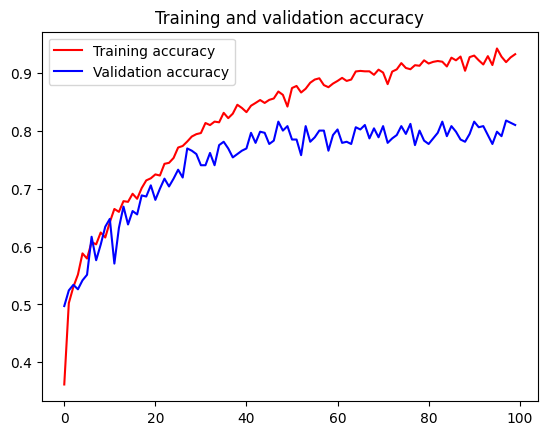

<Figure size 640x480 with 0 Axes>

In [88]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

1/1 [==============================] - 0s 33ms/step


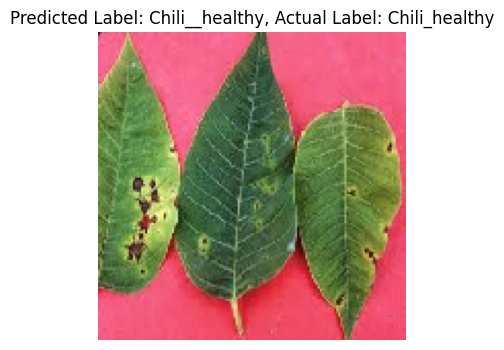

In [104]:
# Testing the Model
test_image_path = './Data_split/test/Chili__leaf spot/leaf spot69.jpg'

def generate_predictions(test_image_path, actual_label):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='Chili_healthy')